In [1]:
import cfgrib as cfgrib 
import metpy
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
mesh = xr.open_mfdataset('*.grib2', engine="cfgrib")
#mesh = cfgrib.open_dataset('2020.grib2')

Ignoring index file '/home/jgoodin1/2020.grib2.923a8.idx' incompatible with GRIB file
ECCODES ERROR   :  Truncating time: non-zero seconds(33) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(33) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(29) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(29) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(33) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(33) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(30) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(30) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(31) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(31) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(30) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(30) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(29) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(29) ignored
ECCO

In [3]:
mesh

<xarray.Dataset>
Dimensions:         (time: 1175, latitude: 3500, longitude: 7000)
Coordinates:
  * time            (time) datetime64[ns] 2019-01-01 ... 2020-01-22T03:00:00
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 500.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      (time) datetime64[ns] dask.array<chunksize=(667,), meta=np.ndarray>
Data variables:
    unknown         (time, latitude, longitude) float32 dask.array<chunksize=(667, 3500, 7000), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2022-08-03T17:02 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
mesh

<xarray.Dataset>
Dimensions:         (time: 1175, latitude: 3500, longitude: 7000)
Coordinates:
  * time            (time) datetime64[ns] 2019-01-01 ... 2020-01-22T03:00:00
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 500.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      (time) datetime64[ns] dask.array<chunksize=(667,), meta=np.ndarray>
Data variables:
    unknown         (time, latitude, longitude) float32 dask.array<chunksize=(667, 3500, 7000), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2022-08-03T17:02 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
mesh.unknown.sel(time = '2019-01-01')

<xarray.DataArray 'unknown' (time: 24, latitude: 3500, longitude: 7000)>
dask.array<getitem, shape=(24, 3500, 7000), dtype=float32, chunksize=(24, 3500, 7000), chunktype=numpy.ndarray>
Coordinates:
  * time            (time) datetime64[ns] 2019-01-01 ... 2019-01-01T23:00:00
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 500.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      (time) datetime64[ns] dask.array<chunksize=(24,), meta=np.ndarray>
Attributes:
    GRIB_paramId:                             0
    GRIB_dataType:                            ra
    GRIB_numberOfPoints:                      24500000
    GRIB_typeOfLevel:                         heightAboveSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  7000
    GRIB_Ny:                                  3500
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           unknown
    GRIB_gridDefinitionDescription:           Latitude/longitude
    GRIB_iDirectionIncrementInDegrees:        0.01
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.01
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   54.995
    GRIB_latitudeOfLastGridPointInDegrees:    20.005001
    GRIB_longitudeOfFirstGridPointInDegrees:  230.005
    GRIB_longitudeOfLastGridPointInDegrees:   299.994998
    GRIB_missingValue:                        9999
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown

In [5]:
mesh_inch = mesh.unknown * 0.0393701 #Convert to in
mesh_resample = mesh.groupby('time.day').max('time') #Resample to group by daily max value

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/anaconda3/envs/pyEAE/lib/

In [5]:
lats = mesh.latitude.values
lons = mesh.longitude.values
#mesh_over_inch = np.where(mesh_resample >= 1 & mesh_resample[mesh_inch == 0] = np.nan)

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/anaconda3/envs/pyEAE/lib/

KeyboardInterrupt: 

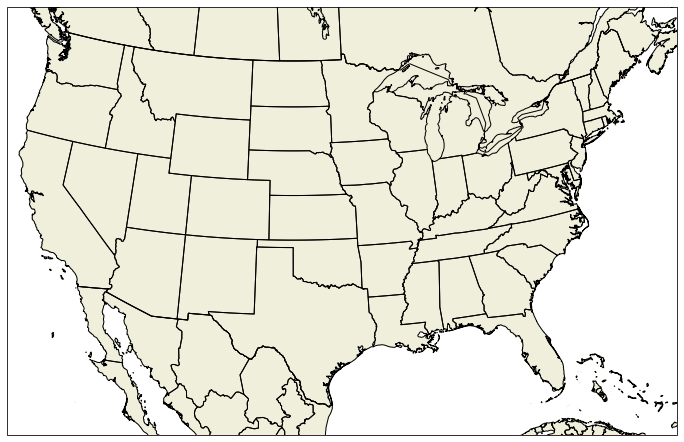

In [9]:
fig = plt.figure(figsize= (12,8)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax1 = plt.subplot(projection = map_proj)
ax1.add_feature(cfeature.LAND.with_scale('10m')) #Add land
ax1.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax1.add_feature(cfeature.STATES.with_scale('10m')) #Add US states
ax1.set_extent([240,287,22,50]) #Set lat/lon boundaries
lrFig = ax1.pcolormesh(lons, lats, mesh_resample, transform = ccrs.PlateCarree())
ax2 = plt.subplot(gs1[1, 0])
cb = plt.colorbar(lrFig, cax = ax2, orientation = 'horizontal')